In [27]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

# Корреляция. Визуализация корреляции в python

Загрузим датасет "Hessen House Prices Dataset" из kaggle (https://www.kaggle.com/orgesleka/hessen-house-prices-dataset). 

In [6]:
url=r"D:\Netology\data\houses.json"
df=pd.read_json(url)
df.head()

,posterid,Haustyp,Angebotstyp,Wohnflaeche__m²_,Zimmer,abtest,plz,Verkaeufer,yo_m,Baujahr,...,Verfuegbar_ab_Jahr,Dachboden,Verfuegbar_ab_Monat,Nebenkosten__in_€_,Kaution__in_€_,Haustiere_erlaubt,Warmmiete__in_€_,Heizkosten__in_€_,WG_geeignet,Denkmalobjekt
0,50316225,einfamilienhaus,Angebot,160,6,control,33378,gewerblich,A,1928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50379245,mehrfamilienhaus,Angebot,160,8.0,control,65207,gewerblich,A,1968.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40815451,einfamilienhaus,Angebot,120,4,control,54647,gewerblich,A,1750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49513983,einfamilienhaus,Angebot,140,5,control,7646,gewerblich,A,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49797192,einfamilienhaus,Angebot,80,4,control,54597,gewerblich,A,1900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Построим матрицу корреляций

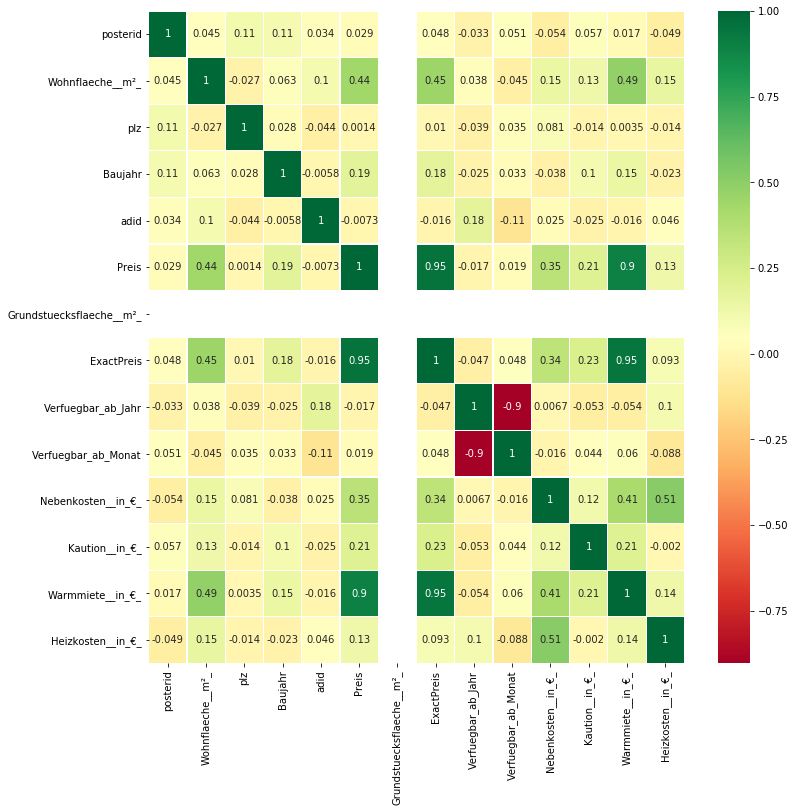

In [28]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


По матрице корреляций можно сделать вывод, что цена на дом линейно зависима с показателем цены на аренду этого дома

 Для наглядности, создадим новую таблицу, куда включим только несколько столбцов: это стоимость аренды дома (включая отопление) и стоимость дома.

Text(0, 0.5, 'стоимость дома')

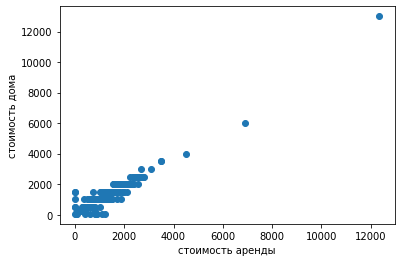

In [8]:
Warmmiete = df['Warmmiete__in_€_']
Preis = df['Preis']
plt.scatter(Warmmiete, Preis)
plt.xlabel('стоимость аренды')
plt.ylabel('стоимость дома')

**Почистим выбросы:** удалим нулевые значения, удалим дома с ценой более 6000 и равные нулю

In [9]:
df = df[df['Preis']<6000]
df = df[df['Preis']>0]
df = df[df['Warmmiete__in_€_']>0]

Text(0, 0.5, 'стоимость дома')

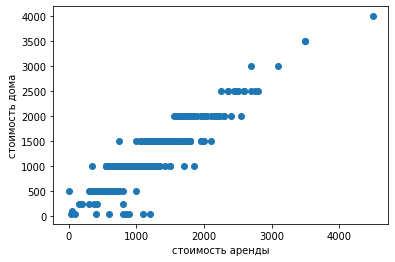

In [19]:
Warmmiete = df['Warmmiete__in_€_']
Preis = df['Preis']
plt.scatter(Warmmiete, Preis)
plt.xlabel('стоимость аренды')
plt.ylabel('стоимость дома')

In [20]:
Warmmiete

64       1990.0
81       1650.0
103       950.0
115      1000.0
120       780.0
          ...  
22286    2000.0
22287    1400.0
22373     820.0
22376    1020.0
22382     450.0
Name: Warmmiete__in_€_, Length: 708, dtype: float64

In [11]:
Warmmiete = df['Warmmiete__in_€_']
Preis = df['Preis']

In [12]:
pearsonr(Warmmiete, Preis)

(0.9004614838534541, 1.7820036846042713e-257)

Довольно сильная корреляция в данных.

In [39]:
df[['Warmmiete__in_€_', 'Preis']]

,Warmmiete__in_€_,Preis
64,1990.0,2000.0
81,1650.0,1500.0
103,950.0,1000.0
115,1000.0,1000.0
120,780.0,1000.0
...,...,...
22286,2000.0,2000.0
22287,1400.0,1500.0
22373,820.0,1000.0
22376,1020.0,1000.0


**Ковариация** - степень разброса данных относительно друг друга.

Посчитаем ковариацию двух выборок в pandas с помощью cov():

In [13]:
df[['Warmmiete__in_€_', 'Preis']].cov()

,Warmmiete__in_€_,Preis
Warmmiete__in_€_,244186.087653,210999.995505
Preis,210999.995505,224860.769824


Можно заметить, что ковариация положительная (имеет **положительный тренд**)

**Корреляция** - нормированная ковариация. Равна корреляции Пирсона. Равна также (ковариация/((стандартное отклонение первой величины) * (стандартное отклонение второй величины)))

In [29]:
covariance = df[['Warmmiete__in_€_', 'Preis']].cov().loc['Warmmiete__in_€_', 'Preis']
variance = statistics.pstdev(Warmmiete)*statistics.pstdev(Preis)
correlation = covariance/variance
print(correlation)

0.9017351210300474


Коэффициент корреляции Пирсона = 0.90 или 90%.

Команда **sns.regplot** строит прямую, по которой две выборки линейно коррелируют друг с другом

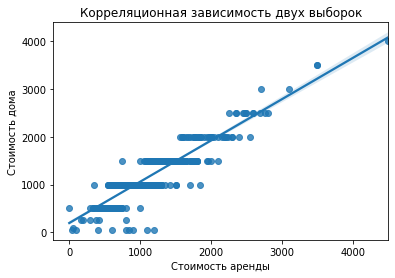

In [30]:
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x= Warmmiete, y=Preis, data=df, fit_reg=True)
plt.xlabel('Стоимость аренды')
plt.ylabel('Стоимость дома')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Корреляция **regplot** с добавлением **регрессионного анализа**. Линейная регрессия -  используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости.

# Линейная регрессия

Построим модель для двух переменных Freedom и Positive affect

Библиотека sklearn в python - мощное средство для анализа данных. Позволяет строить различные модели.

Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array

In [23]:
Warmmiete

64       1990.0
81       1650.0
103       950.0
115      1000.0
120       780.0
          ...  
22286    2000.0
22287    1400.0
22373     820.0
22376    1020.0
22382     450.0
Name: Warmmiete__in_€_, Length: 708, dtype: float64

In [24]:
warmmiete = np.array(Warmmiete).reshape(-1,1)
preis = np.array(Preis).reshape(-1,1)

In [25]:
warmmiete

array([[1.990e+03],
       [1.650e+03],
       [9.500e+02],
       [1.000e+03],
       [7.800e+02],
       [2.100e+03],
       [1.400e+03],
       [1.100e+03],
       [1.200e+03],
       [1.350e+03],
       [1.130e+03],
       [8.700e+02],
       [1.538e+03],
       [2.000e+03],
       [1.600e+02],
       [1.150e+03],
       [7.000e+02],
       [1.650e+03],
       [9.500e+02],
       [1.364e+03],
       [1.350e+03],
       [1.500e+03],
       [1.000e+03],
       [1.700e+03],
       [1.285e+03],
       [1.500e+03],
       [1.300e+03],
       [2.050e+03],
       [9.400e+02],
       [1.310e+03],
       [1.180e+03],
       [1.390e+03],
       [1.960e+03],
       [1.200e+03],
       [1.110e+03],
       [1.600e+03],
       [1.200e+03],
       [8.800e+02],
       [6.850e+02],
       [8.710e+02],
       [1.000e+03],
       [9.350e+02],
       [1.750e+03],
       [1.670e+03],
       [1.050e+03],
       [1.200e+03],
       [9.500e+02],
       [7.700e+02],
       [9.500e+02],
       [1.350e+03],


Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**Задача:** научиться предсказывать **Стоимость цены на дом (Preis)** зная параметр **Стоимость аренды (Warmmiete)** с помощью линейной регрессии

Разделим на 80% тренировочных и на 20% тестовых

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    warmmiete,
    preis,
    test_size = 0.2
)

Обучим модель с помощью **fit()** метода

In [32]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим предсказания модели на тестируемых данных

In [33]:
predicted_y = model.predict(X_test)

Посчитаем ошибку модели (считаем отдельно **абсолютную** ошибку и **среднеквадратическую** ошибку

**Абсолютная ошибка** считается по формуле:

$$AE=\frac{1}{n}\sum_{i=1}^{n}\left |Y_i-\bar{Y}_i\right |$$

**Среднеквадратичная ошибка** считается по формуле:

$$MSE=\frac{1}{n}\sum_{i=1}^{n}\left ( Y_i-\bar{Y}_i\right )^2$$

где $Y_i$ - реальная стоимость дома, $Y_i$ - предсказанная стоимость дома

In [37]:
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

34499.49591603592
155.1492121601695


model.score - подсчет среднеквадратичной ошибки

В идеале: ошибка модели должна стремится к нулю. К сожалению, ошибка абсолютная стремится к 136, а среднеквадратичная стремится к 35975.

Построим график линейной регресии

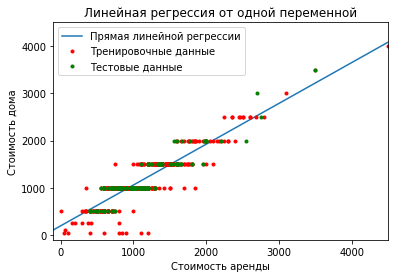

In [38]:
plt.xlabel('Стоимость аренды')
plt.ylabel('Стоимость дома')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-100, 5000, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.xlim(-100,4500)
plt.ylim(-100,4500)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

В данном случае получается зависимость двух переменных: **чем больше стоимость аренды, тем более высокая цена на дом.**

# Примеры матрицы корреляций для 3 выборок

Загрузим датасет цветов ириса. 
В этом датасете показана проблема **классификации**.
В этом датасете всего 3 класса различных цветов. Каждый из классов отличается по 4 параметрам (features): 
1.  sepal length in cm 
2.  sepal width in cm 
3.  petal length in cm 
4.  petal width in cm 

Названия классов: 
*  Iris Setosa 
*  Iris Versicolour 
*  Iris Virginica

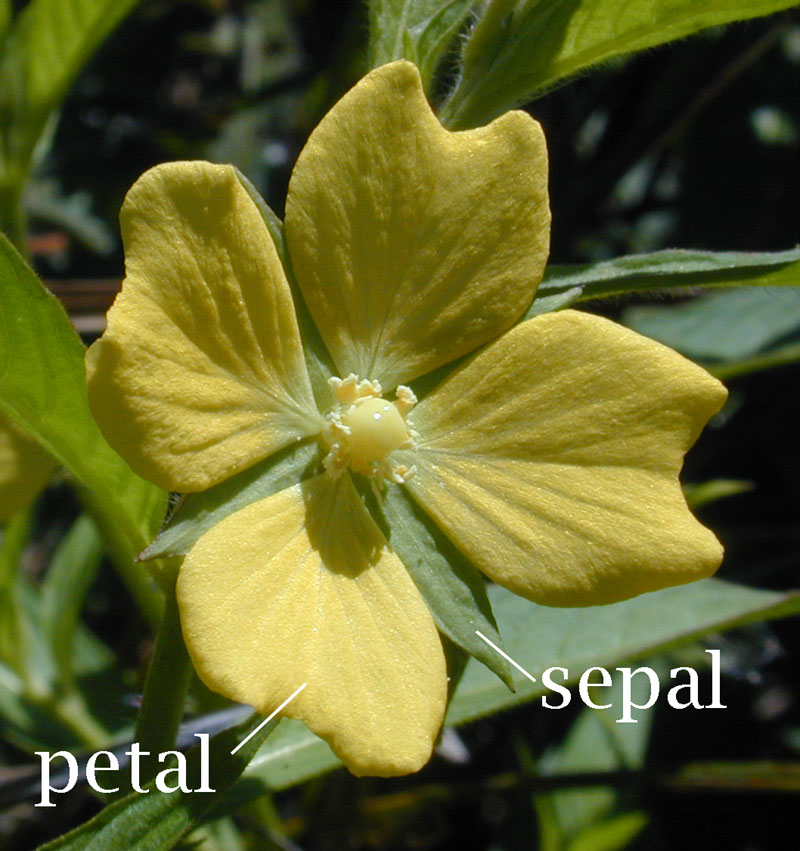

In [85]:
from IPython.display import Image
Image('https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg', width=300, height=300)

Загрузим датасет:

In [86]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Всего 3 типа цветков: setose, versicolor, virginica

In [87]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Построим попарные графики для выборок, а также частотные графики на главной диагонали  с помощью метода **pairplot**.

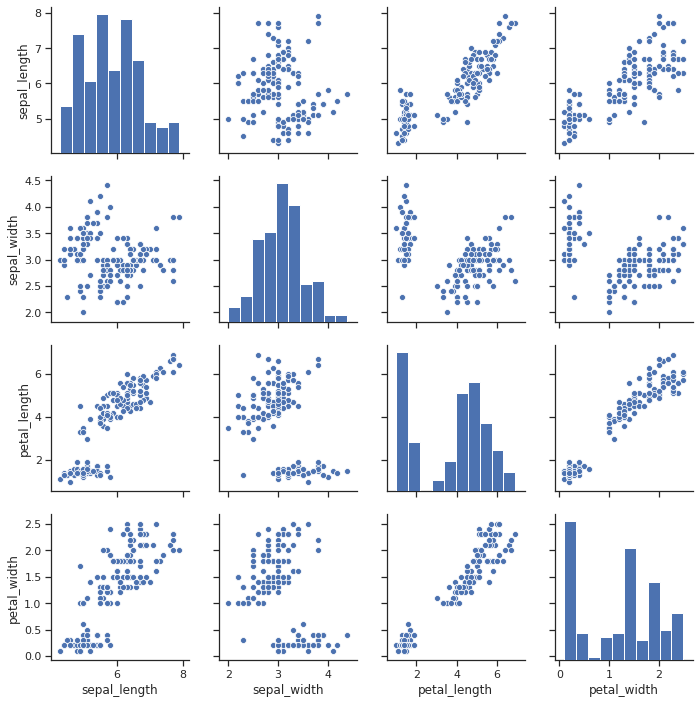

In [88]:
g = sns.pairplot(iris)

Проведем классификационный анализ всех выборок попарно с помощью параметра hue, где мы указываем наименование классов:

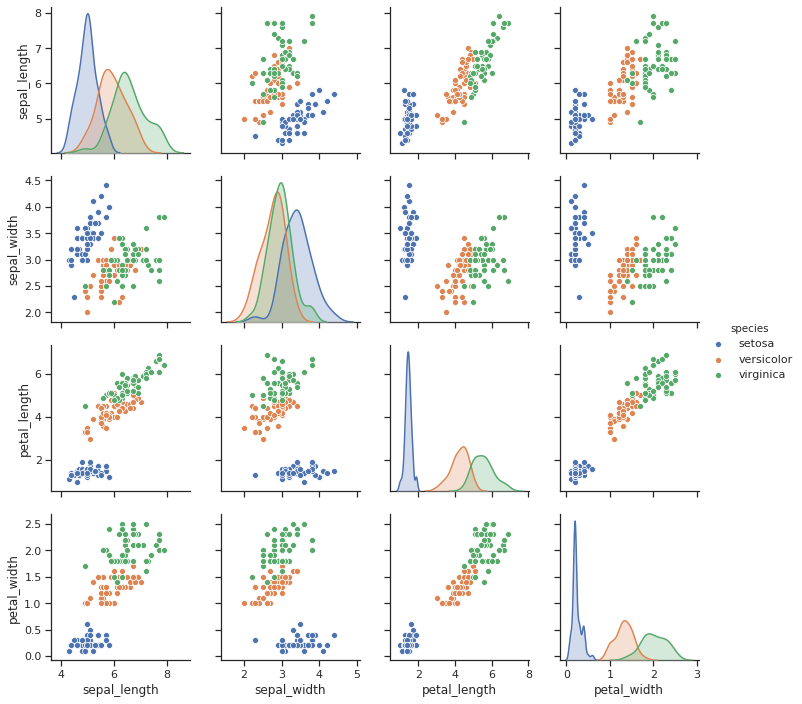

In [89]:
fig = sns.pairplot(data=iris, hue='species')
plt.show()

Посмотрим различия трех видов цветов друг от друга

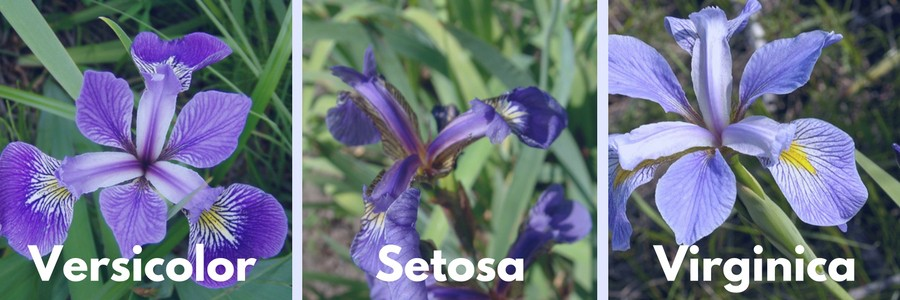

In [90]:
from IPython.display import Image
Image('https://pp.userapi.com/c853524/v853524724/6e4da/vduVoAF89Zg.jpg')

3 типа цветов отличаются размерами цветков и лепестков. 2 из этих цветков похожи между собой.

Матрица корреляций для 4-мерного пространства:

$$
\Sigma = \begin{bmatrix}
    \rho_{1}^2  \quad \rho_{1,2} \quad \rho_{1,3} \quad \rho_{1,4} \\
    \rho_{2,1}  \quad \rho_{2}^2 \quad \rho_{2,3} \quad \sigma_{2,4} \\
    \rho_{3,1}  \quad \rho_{3,2} \quad \rho_{3}^2 \quad \rho_{4,3} \\
    \rho_{4,1}  \quad \rho_{4,2} \quad \rho_{4,3} \quad \rho_{4}^2
\end{bmatrix}
$$


**Критерий Пирсона** также не зависит от нормирования


Корелляция Пирсона:
$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$
Измеряет линейную зависимость между величинами, предполагая, что выборки составляют нормальное распределение

Матрица корреляций - это нормированная матрица корреляций.

Создадим таблицу X из таблицы о цветах ириса: выбираем первые четыре колонки (команда .iloc[:,:4])

In [91]:
X = iris.iloc[:,:4]

In [92]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Для подсчета **матрицы корреляций** можно использовать метод corr, который нормализует значения.

In [93]:
np.round_(X.corr(), decimals=2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


2-ой способ подсчета матрицы корреляций:

In [94]:
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


**Но!** Корреляция не всегда линейна

# Нормальное распределение. Правило трех сигм.

Возьмем выборку sepal_width датасета ирисов:

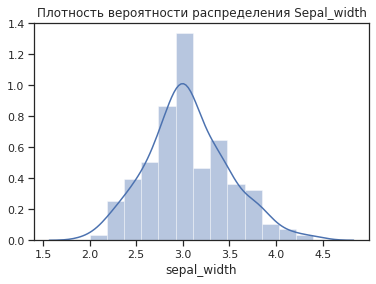

In [95]:
sepal_width = iris['sepal_width']
sns.distplot(sepal_width)
plt.title('Плотность вероятности распределения Sepal_width')
plt.show()

По графику можно определить, что выборка является нормальной.

**Правило трех сигм гласит**, что вероятность того, что случайная величина отклонится от своего математического ожидания более, чем на три среднеквадратических отклонений, практически равна 0. 

Посчитаем математическое ожидание для выборки.



In [96]:
statistics.mean(sepal_width)

3.0573333333333332

Посчитаем среднеквадратичное отклонение:

In [97]:
statistics.pstdev(sepal_width)

0.43441096773549454

Посчитаем количество элементов, лежащих в промежутке, выходящем за интервалы mean +/- 3*sigma, где sigma - среднеквадратическое отклонение, mean - мат ожидание

In [98]:
mean = statistics.mean(sepal_width)
sigma = statistics.pstdev(sepal_width)
count_ = sepal_width[(sepal_width>=mean-3*sigma) & (sepal_width<=mean+3*sigma)].count()
print(count_/len(sepal_width))

0.9933333333333333


Посчитаем количество элементов, лежащих в промежутке, выходящем за интервалы mean +/- 2*sigma:

In [99]:
count_ = sepal_width[(sepal_width>=mean-2*sigma) & (sepal_width<=mean+2*sigma)].count()
print(count_/len(sepal_width))

0.9666666666666667


Количество элементов, лежащих в промежутке от [mean-sigma; mean+sigma]:

In [100]:
count_ = sepal_width[(sepal_width>=mean-sigma) & (sepal_width<=mean+sigma)].count()
print(count_/len(sepal_width))

0.6733333333333333


# Центральная предельная теорема

Сгенерируем равномерное распределение:

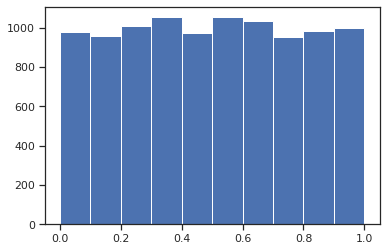

In [107]:
number_of_randoms = 10000
plt.hist(np.random.rand(number_of_randoms))
plt.show()

Данная выборка является равномерной. Сгенерируем 1000 таких выборок. Суммы элементов элементов выборок стремится к нормальному распределению.

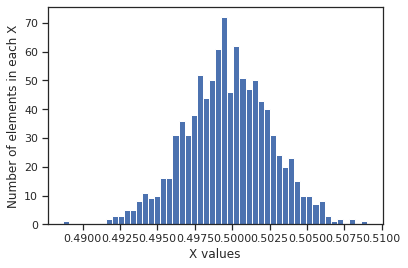

In [108]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(np.random.rand(number_of_randoms))/number_of_randoms
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

   Закон больших чисел играет важное значение в теоретическом плане, т.к. он служит обоснованием методов математической статистики. На практике закон больших чисел можно продемонстрировать на примере погоды. Например, **атмосферное давление** каждый день есть величина случайная. Однако ее среднегодовое значение в течении многих лет практически не изменяется. 


# Непрерывное распределение:

In [109]:
import io
import requests
avocado = pd.read_csv('data/avocado.csv', index_col=0)
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [110]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [111]:
large_bags = avocado['Large Bags']

Посмотрим частотный график данных для large_bags

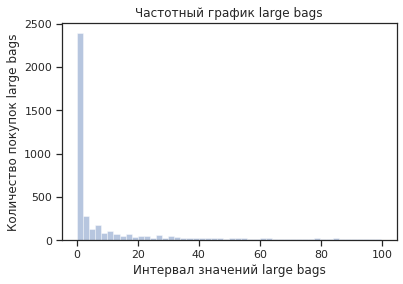

In [112]:
sns.distplot(large_bags[large_bags<100], kde = False)
plt.xlabel('Интервал значений large bags')
plt.ylabel('Количество покупок large bags')
plt.title('Частотный график large bags')
plt.show()

Похоже на геометрическое (но геометрическое - это дискретное распределение). Следующее предположение - это распределение экспоненциальное (является непрерывным).

Данное распределение очень похоже на **геометрическое распределение** или **логнормальное**, или **экспоненциальное**

Но **геометрическое распределение** для **дискретных величин**, в нашем случае это **непрерывная величина**. Значит, это скорее **логнормальное распределение** или **экспоненциальное**. 

Посмотрим как выглядит логнормальное распределение. Генерация **логнормального** распределения с помощью python

/home/orange/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


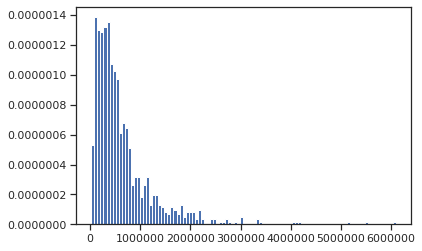

In [113]:
mu, sigma = 13., 0.9 # среднее значение и отклонение
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
plt.show()

Логнормальное распределение задается плотностью вероятности, имеющей вид:
$$p(x)=\frac{1}{\sigma x\sqrt{2\pi }}e^{-\frac{(ln(x)-\mu )^{2}}{2\sigma^{2}}}$$

где $\mu$ это среднее значение, а $\sigma$ стандартное отклонение нормального распределения логарифма. 

Генерация **экспоненциального распределения** 

/home/orange/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


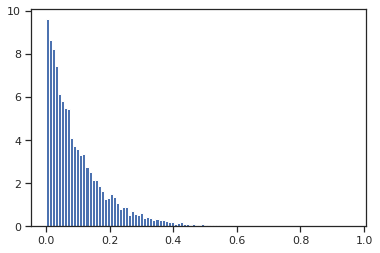

In [114]:
scale, size = 0.1 , 10000 # scale = параметр beta, size - размер выборки
s = np.random.exponential(scale=scale, size=size)
count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
plt.show()

**Экспоненциальное распределение** задается плотностью вероятности, имеющий вид:

$$f(x;\frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$$

для x >= 0, и равно нулю в остальных случаях.

$\beta$ - scale параметр в предыдущем коде.

**Экспоненциальное распределение** является аналогом геометрического распределения в непрерывных распределениях. Типичный пример экспоненциального распределения - размер дождевой капли, полученный в ходе множества дождевых бурь. Другой пример - время между запросами к страницам wikipedii. 

# Дискретные распределения

В данном распределении число значений определено (например, это подбрасывание кубика, выпадение монеты, карты).

**Распределение Бернулли**

Бернулли возвращает значения либо 1, либо 0. Чтобы сгенерировать 10000 случайных чисел Бернулли с вероятностью успеха p =0.3, мы будем использовать bernoulli.rvs с 2мя аргументами.

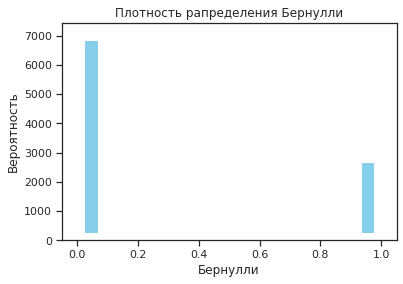

In [115]:
# import seaborn
data_bern = stats.bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения Бернулли')
plt.show()

Колонка type в таблице цен на авокадо также представляет собой распределение Бернулли

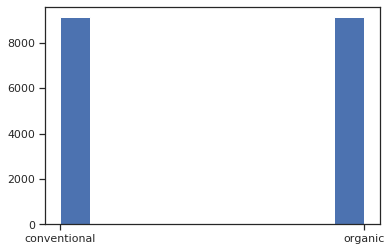

In [116]:
plt.hist(avocado['type'])
plt.show()

In [117]:
len(avocado[avocado['type']=='conventional'])/len(avocado)

0.5000821962847279

# Биномиальное распределение

Распределе́ние Берну́лли в теории вероятностей и математической статистике — дискретное распределение вероятностей, моделирующее случайный эксперимент произвольной природы, при заранее известной вероятности успеха или неудачи.

Киньте честную монету два раза – сколько раз будет орёл? Это число, подчиняющееся биномиальному распределению. Его параметры – n, число испытаний, и p – вероятность «успеха» (в нашем случае – орла или 1). Каждый бросок – распределённый по Бернулли исход, или испытание. Используйте биномиальное распределение, когда считаете количество успехов в вещах типа броска монеты, где каждый бросок не зависит от других и имеет одинаковую вероятность успеха.

Или представьте урну с одинаковым количество белых и чёрных шаров. Закройте глаза, вытащите шар, запишите его цвет и верните назад. Повторите. Сколько раз вытащился чёрный шар? Это число также подчиняется биномиальному распределению.

In [118]:
data_binom = stats.binom.rvs(n=10,p=0.3,size=10000)

Рассматриваем n экспериментов с вероятностью успеха p = 30%. После 10 подбрасываний монеты (вероятность выпадения орла 30%) какова вероятность выпадения орла 6 раз подряд? 

[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

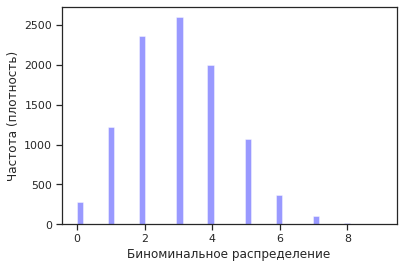

In [119]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

# Геометрическое распределение

Геометри́ческое распределе́ние в теории вероятностей — распределение дискретной случайной величины, равной количеству испытаний случайного эксперимента до наблюдения первого «успеха». 
Пусть $X_{1},...X_{n}$ - бесконечная последовательность независимых случайных величин с распределением Бернулли, то есть
$$X_{i} = \left \{ \begin{matrix}
1, & p & \\ 
0, & q=1-p & i = 1,2,.. 
\end{matrix} \right.$$
Построим случайную величину ${\displaystyle Y=\min \left\{i\mid X_{i}=1\right\}-1}$ — количество «неудач» до первого «успеха». Распределение случайной величины Y называется геометрическим с вероятностью «успеха» p, что обозначается следующим образом:  $Y\sim \mathrm {Geom} (p)$.
Функция вероятности случайной величины Y имеет вид:

${\displaystyle \mathbb {P} (Y=n)=q^{n}p,\;n=0,1,2,\ldots } $

col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14  16
row_0                                                                      
counts  4984  2553  1262  576  303  161  85  37  15   6   5   6   5   1   1


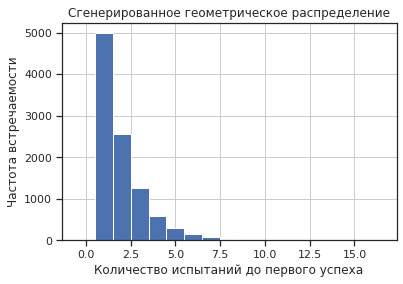

In [137]:
import random
random.seed(12)

flips_till_heads = stats.geom.rvs(size=10000,  # сгенерировать дату
                                  p=0.5)       # с вероятностью успеха 0.5

# Напечатать данные
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Частотная зависимость
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1)
plt.xlabel('Количество испытаний до первого успеха')
plt.ylabel('Частота встречаемости')
plt.title('Сгенерированное геометрическое распределение')
plt.show()

График распределения похож на то, что мы ожидаем: очень вероятно получить значение решки за одно или два подкидывания монеты, и маловероятно получить только за 5 подкидываний. В 10000 сгенерированных подкидываний, самое максимальное занимает 13 подкидываний, чтобы получить решку. 

# Распределение Стьюдента



In [138]:
from scipy.stats import t

# Количество выборки df=20, loc=0, scale=1 stats() для вычисления среднего, разброса, 
# негативное skew показывает, что выборка сдвинута влево, положительное - что сдвинута вправо
#
rv = t(df=20, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.11111111), array(0.), array(0.375))

Получение информации о распределении


*  loc - положение центра выборки (на сколько смещена относительно центра)
*  scale - масштабирование выборки (разброс)
*  skew - коэффицие́нт асимметри́и в теории вероятностей — величина, характеризующая асимметрию распределения данной случайной величины: положительное - выборка наклонена вправо, отрицательная - влево

![skew](https://pp.userapi.com/c851536/v851536486/ffb71/uFExpi7Pxvs.jpg)
*  kurt - коэффицие́нт эксце́сса - мера остроты пика

![kurt](https://pp.userapi.com/c851536/v851536486/ffb82/sRWYxq1SCR0.jpg)



График плотности распределения

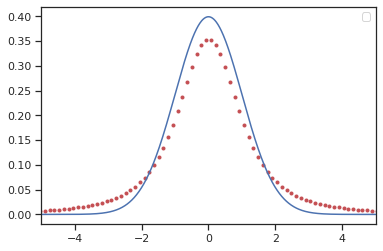

In [139]:
rv = t(df=2, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)
y = rv.pdf(x) 

x1 = np.linspace(-5,5,1000)   
y1 = norm.pdf(x1)              

plt.xlim(-5,5)
plt.legend(['Нормальное распределение', 'Стьюдента'])
plt.plot(x,y,'r.')
plt.plot(x1,y1,'b')
plt.show()